## Luke Schwenke
### Machine Learning: Homework 2 - Gradient Descent
### April 15, 2023

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
os.getcwd()

'/Users/lmschwenke'

In [3]:
os.chdir('/Users/lmschwenke/downloads')

In [4]:
df = pd.read_csv('bottle.csv', low_memory=False)

# Part A - Data Cleaning & EDA

In [5]:
df.shape

(864863, 74)

In [6]:
df = df[['T_degC', 'Salnty', 'STheta', 'O2ml_L', 'Depthm']]

In [7]:
df = df.dropna()

In [8]:
df.shape

(661268, 5)

In [9]:
# Remove Outliers (filter out where water density > 200 )
df = df[df['STheta']<200]
df.shape

(661268, 5)

# Part B - Train & Test Split

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler

In [11]:
X = df.drop('T_degC', axis=1)
y = df['T_degC']

# Split into X/y Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

In [12]:
X.shape

(661268, 4)

In [13]:
y.shape

(661268,)

In [14]:
scaler = StandardScaler()

# Fit the StandardScaler to the data
scaler.fit(X_train)

# Transform the data using the fitted StandardScaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Part C - Linear Regression with Sklearn

In [15]:
from sklearn.linear_model import LinearRegression

# Instance of LinearRegression Class
lin_reg = LinearRegression()

# Fit the model
model = lin_reg.fit(X_train_scaled, y_train)

In [16]:
model.coef_, model.intercept_

(array([ 1.63134329, -4.63396809,  0.29988205, -0.47550838]),
 10.917750405471294)

In [17]:
y_pred_sklearn = model.predict(X_test_scaled)

In [18]:
y_pred_sklearn #T_degC

array([ 5.27875969,  3.94060321, 16.3084714 , ..., 10.06612188,
        9.78492568,  8.38735213])

In [19]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Calculate the mean squared error (MSE) of the predictions
mse = mean_squared_error(y_test, y_pred_sklearn)
print("Mean Squared Error (MSE): ", mse)

# Calculate the R-squared score of the model
r2 = r2_score(y_test, y_pred_sklearn)
print("R-squared score: ", r2)

# Calculate the explained variance score of the model
evs = explained_variance_score(y_test, y_pred_sklearn)
print("Explained Variance Score: ", evs)

Mean Squared Error (MSE):  0.11067555865667496
R-squared score:  0.9937843981539197
Explained Variance Score:  0.9937844110363018


Text(0.5, 1.0, 'Actual vs. Predicted Temperatures (Sklearn - Test Set)')

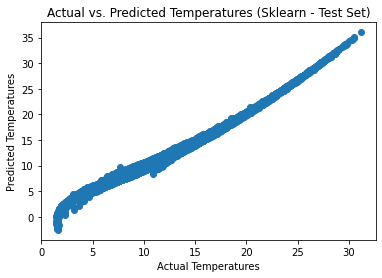

In [20]:
plt.scatter(y_test, y_pred_sklearn)

plt.xlabel('Actual Temperatures')
plt.ylabel('Predicted Temperatures')
plt.title('Actual vs. Predicted Temperatures (Sklearn - Test Set)')

# Part D - Gradient Descent Mini-Batch

In [21]:
from sklearn.preprocessing import add_dummy_feature

np.random.seed(42)  # to make this code example reproducible

X_train_scaled_dummy = add_dummy_feature(X_train_scaled)  # add x0 = 1 to each instance
X_test_scaled_dummy = add_dummy_feature(X_test_scaled)

In [22]:
def mgd(X_train_scaled_dummy, y_train, minibatch_size):
    theta_path_mgd = []

    n_iterations = 100
    eta = 0.1
    m = len(X_train_scaled_dummy)

    np.random.seed(42)
    theta = np.random.randn(5,1)  # random initialization

    t = 0
    for epoch in range(n_iterations):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_train_scaled_dummy[shuffled_indices]
        y_shuffled = np.array(y_train)[shuffled_indices]
        for i in range(0, m, minibatch_size):
            t += 1
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            yi = yi.reshape(-1, 1)  # reshape yi to match the shape of xi.dot(theta)
            gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - eta * gradients
            theta_path_mgd.append(theta)
            
    return theta

In [23]:
mgd_50 = mgd(X_train_scaled_dummy, y_train, 50)
mgd_250 = mgd(X_train_scaled_dummy, y_train, 250)
mgd_2000 = mgd(X_train_scaled_dummy, y_train, 2000)

In [24]:
y_pred_50 = X_test_scaled_dummy @ mgd_50 # @ = Matrix Multiplication
y_pred_250 = X_test_scaled_dummy @ mgd_250
y_pred_2000 = X_test_scaled_dummy @ mgd_2000

In [25]:
print("Mean squared error for test data with mini-batch sizes of 50 is ",mean_squared_error(y_test, y_pred_50))
print("R-squared for test data with mini-batch sizes of 50 is ",r2_score(y_test, y_pred_50))
print("Explained variance for test data with mini-batch sizes of 50 is ",explained_variance_score(y_test, y_pred_50))

Mean squared error for test data with mini-batch sizes of 50 is  0.11587021583751272
R-squared for test data with mini-batch sizes of 50 is  0.993492663274468
Explained variance for test data with mini-batch sizes of 50 is  0.9935074334835103


In [26]:
print("Mean squared error for test data with mini-batch sizes of 250 is ",mean_squared_error(y_test, y_pred_250))
print("R-squared for test data with mini-batch sizes of 250 is ",r2_score(y_test, y_pred_250))
print("Explained variance for test data with mini-batch sizes of 250 is ",explained_variance_score(y_test, y_pred_250))

Mean squared error for test data with mini-batch sizes of 250 is  0.11199822750720768
R-squared for test data with mini-batch sizes of 250 is  0.9937101163246802
Explained variance for test data with mini-batch sizes of 250 is  0.9937224015174259


In [27]:
print("Mean squared error for test data with mini-batch sizes of 2000 is ",mean_squared_error(y_test, y_pred_2000))
print("R-squared for test data with mini-batch sizes of 2000 is ",r2_score(y_test, y_pred_2000))
print("Explained variance for test data with mini-batch sizes of 2000 is ",explained_variance_score(y_test, y_pred_2000))

Mean squared error for test data with mini-batch sizes of 2000 is  0.11069650152391655
R-squared for test data with mini-batch sizes of 2000 is  0.993783221990674
Explained variance for test data with mini-batch sizes of 2000 is  0.9937841828137167


Text(0.5, 1.0, 'Actual vs. Predicted Temperatures for mini-batch sizes of 50')

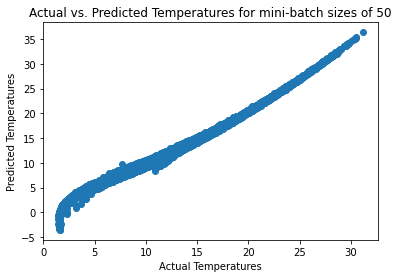

In [28]:
plt.scatter(y_test, y_pred_50)

plt.xlabel('Actual Temperatures')
plt.ylabel('Predicted Temperatures')
plt.title('Actual vs. Predicted Temperatures for mini-batch sizes of 50')

Text(0.5, 1.0, 'Actual vs. Predicted Temperatures for mini-batch sizes of 250')

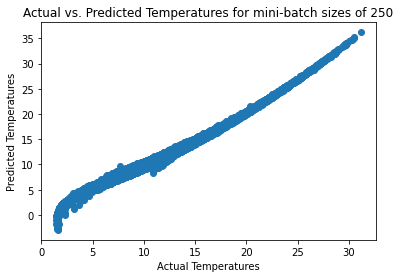

In [29]:
plt.scatter(y_test, y_pred_250)

plt.xlabel('Actual Temperatures')
plt.ylabel('Predicted Temperatures')
plt.title('Actual vs. Predicted Temperatures for mini-batch sizes of 250')

Text(0.5, 1.0, 'Actual vs. Predicted Temperatures for mini-batch sizes of 2000')

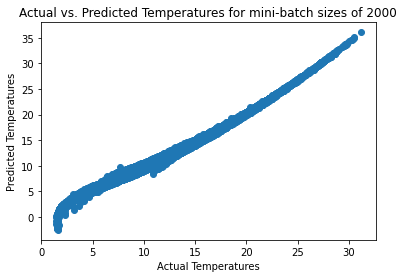

In [30]:
plt.scatter(y_test, y_pred_2000)

plt.xlabel('Actual Temperatures')
plt.ylabel('Predicted Temperatures')
plt.title('Actual vs. Predicted Temperatures for mini-batch sizes of 2000')

In [31]:
y_train_50 = X_train_scaled_dummy @ mgd_50
y_train_250 = X_train_scaled_dummy @ mgd_250
y_train_2000 = X_train_scaled_dummy @ mgd_2000

In [32]:
print("Mean squared error for training data with theta of batch size 50 is ",mean_squared_error(y_train, y_train_50))
print("R-squared for training data with theta of batch size 50 is ",r2_score(y_train, y_train_50))
print("Explained variance for training data with theta of batch size 50 is ",explained_variance_score(y_train, y_train_50))

Mean squared error for training data with theta of batch size 50 is  0.11516242783561079
R-squared for training data with theta of batch size 50 is  0.9935507608421856
Explained variance for training data with theta of batch size 50 is  0.9935666759673333


In [33]:
print("Mean squared error for training data with theta of batch size 250 is ",mean_squared_error(y_train, y_train_250))
print("R-squared for training data with theta of batch size 250 is ",r2_score(y_train, y_train_250))
print("Explained variance for training data with theta of batch size 250 is ",explained_variance_score(y_train, y_train_250))

Mean squared error for training data with theta of batch size 250 is  0.11173252569797036
R-squared for training data with theta of batch size 250 is  0.9937428396268143
Explained variance for training data with theta of batch size 250 is  0.9937560253470281


In [34]:
print("Mean squared error for training data with theta of batch size 2000 is ",mean_squared_error(y_train, y_train_2000))
print("R-squared for training data with theta of batch size 2000 is ",r2_score(y_train, y_train_2000))
print("Explained variance for training data with theta of batch size 2000 is ",explained_variance_score(y_train, y_train_2000))

Mean squared error for training data with theta of batch size 2000 is  0.11071426044371674
R-squared for training data with theta of batch size 2000 is  0.9937998637472171
Explained variance for training data with theta of batch size 2000 is  0.9938010626190004


# Part E - Conceptual Questions

**1) Describe how parameter estimation in Gradient Descent differs from using the normal equation.**

* Gradient descent (GD) updates the parameter values **iteratively** by minimizing a cost function like MSE. At each iteration the gradient of the cost function is calculated and updates the parameters in the direction of the negative gradient. GD also uses a learning rate to determine step sizes to speed up or slow down convergence as the algorithm attempts to find the minimum value (smallest error). You can tune hyperparameters like the learning rate or batch size.

* The Normal Equation is different because rather than being iterative, it finds the **exact solution** for parameters of a linear model that minimize a cost function in 1 step. You don't have to tune hyperparameters such as learning rate since the solution is obtained by solving the system of linear equations derived from the cost function. 

**2) We used Mini-Batch Gradient descent here, but there are a variety of options for Gradient Descent. How is Mini-Batch Gradient Descent different from Stochastic Gradient Descent?**

* With Stochastic Gradient Descent (SGD), parameters are updated using the **cost function gradient with respect to a single randomly chosen training example for each iteration**. This is faster than normal batch GD since it processes fewer data points for each iteration. The randomnes can make the covergence to the minimum more noisy.

* Mini-Batch Gradient Descent (MBGD) on the other hand updates the **cost function gradient with respect to a small random subset (mini-batch) of the training set for each iteration**. It is a better balance of the efficiency but erraticness of SGD and the full Batch Gradient Descent that processes all data points for each iteration.


**3) Identify your best-performing version of Gradient Descent and compare the error metrics for test data vs training data. Does this version of gradient descent show signs of overfitting? Explain.**

* The best-performing version of GD was the mini-batch with a size 2,000 and an MSE of 0.11071 on Train and 0.11069 on Test. This version of GD does not show any signs of overfitting since the error and variance explained is very stable between the Train and Test sets.

**4) Explain what the learning rate is for. Even though we did not, why might it be helpful to change the learning rate over time?**

* The learning rate is a tuning parameter that determines the step size at each iteration. This can be helpful to adjust because it can speed up or slow down convergence as the algorithm tries to find the minimum of the cost function. If the learning rate is too high, you can end up missing / jumping over the minimum value. If the learning rate is too low, the converge may be very slow and may not even discover the minimum.

**5) Why would a data scientist want to use early stopping in gradient descent?** 

* Early stopping halts the training process when the model's performance on the validation set starts to degrade or not improve. It is a regularization techinque used to stop a model from overfitting and it can reduce the time it takes to train a model.